In [1]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_OF_PARTIES = 20
ROUNDS = 30
EPOCHS = 6

dataset='femnist'

In [3]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-07T04:42:24.114Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-07T04:42:24.114Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-07T04:42:24.115Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-07T04:42:24.115Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-07T04:42:24.484Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-07T04:42:24.485Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-07T04:42:24.486Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-07T04:42:24.487Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-07T04:43:24.208Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-07T04:43:24.209Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-07T04:43:24.210Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-07T04:43:24.211Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:43:24] "POST /6 HTTP/1.1" 200 -
2021-06-07T04:43:27.445Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-07T04:43:27.446Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-07T04:43:27.447Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-07T04:43:27.448Z | 1.0.5 | INFO | werkzeug                               

In [4]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-07T04:43:58.934Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-07T04:43:58.935Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-07T04:43:58.936Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-07T04:43:58.936Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-07T04:43:58.937Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-07T04:43:59.549Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-07T04:43:59.549Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-07T04:43:59.550Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-07T04:43:59.550

2021-06-07T04:46:03.260Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:46:03] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:46:03.314Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:46:03] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:46:03.355Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:46:03] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:46:03.469Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:46:03] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:46:03.545Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:46:03] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:46:03.545Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:46:03] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:46:03.546Z | 1.0.5 | INFO | werkzeug        

2021-06-07T04:47:23.434Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:47:23.488Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:47:23] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:47:23.511Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:47:23.512Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:47:23] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:47:23.515Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:47:23.551Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:47:23] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:47:23.552Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:47:23.553Z | 1.0.5 

2021-06-07T04:48:44.973Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:48:44.998Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:48:44] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:48:45.000Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:48:45.022Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:48:45.058Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:48:45] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:48:45.059Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:48:45.083Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:48:45.101Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-07T04:50:05.422Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:50:05.424Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:50:05] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:50:05.468Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:50:05.470Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:50:05.471Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:50:05] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:50:05.472Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:50:05.485Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:50:05.508Z | 1.0.5 | INFO | werkzeug                

2021-06-07T04:51:24.401Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:51:24.412Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:51:24.477Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:51:24] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:51:24.514Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:51:24.515Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:51:24] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:51:24.584Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:51:24] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:51:24.625Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:51:24.678Z | 1.0.5 

2021-06-07T04:52:43.189Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:52:43] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:52:43.441Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:52:43.871Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-07T04:52:43.874Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:52:43] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:52:44.429Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:52:44.793Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:52:44] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:52:45.507Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:52:45.649Z | 1.0.5 | 

2021-06-07T04:54:02.066Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:54:02] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:54:02.556Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:54:02] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:54:02.555Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:71
2021-06-07T04:54:03.284Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:54:03.527Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:54:03] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:54:04.498Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:54:04.735Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:54:04] "POST /7 HTTP/1.1" 200 -
20

2021-06-07T04:55:20.163Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:55:20.402Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:55:20.623Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:55:20] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:55:20.890Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-07T04:55:20.669Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:55:20.892Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:55:20] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:55:21.232Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:55:21] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:55:21.702Z | 1.0.5 | 

2021-06-07T04:56:36.278Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:56:36] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:56:37.174Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:56:37.725Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:56:37] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:56:38.676Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-07T04:56:41.784Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:56:41.863Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:56:41.916Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:56:41.917Z | 1.0.5 | INFO | werkzeug                  

2021-06-07T04:57:40.777Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-07T04:57:45.784Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-07T04:57:50.794Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-07T04:57:55.801Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-07T04:57:59.236Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:57:59.522Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 04:57:59] "POST /7 HTTP/1.1" 200 -
2021-06-07T04:57:59.527Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T04:57:59.707Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-07T04:58:39.201Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-07T04:58:44.205Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-07T04:58:49.209Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-07T04:58:54.224Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-07T04:58:59.230Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-07T04:59:04.233Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-07T04:59:09.240Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-07T04:59:14.249Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-07T04:59:18.062Z

2021-06-07T04:59:36.314Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-07T04:59:41.318Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-07T04:59:46.325Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-07T04:59:51.333Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-07T04:59:56.339Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-07T05:00:01.346Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-07T05:00:06.349Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-07T05:00:11.357Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-07T05:00:16.361Z

2021-06-07T05:00:48.922Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-07T05:00:48.923Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-07T05:00:48.924Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-07T05:00:48.926Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-07T05:00:53.929Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-07T05:00:58.933Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-07T05:01:03.941Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-07T05:01:08.945Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-

2021-06-07T05:02:09.083Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-07T05:02:09.084Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-07T05:02:09.119Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fcb60a135c0>
2021-06-07T05:02:09.119Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-07T05:02:09.120Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-07T05:02:11.522Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-07T05:02:11.523Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-07T05:02:11.523Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-07T05:03:26.383Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:03:26] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:03:27.046Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:76
2021-06-07T05:03:27.047Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-07T05:03:27.047Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-07T05:03:27.048Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-07T05:03:27.083Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fcb6094a2b0>
2021-06-07T05:03:27.084Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-07T05:03:27.085Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-07T05:04:44.913Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:04:44] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:04:44.982Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:04:44] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:04:45.016Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:04:45] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:04:45.018Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:04:45] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:04:45.056Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:04:45] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:04:48.635Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:80
2021-06-07T05:04:48.636Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-07T05:06:06.231Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:06:06] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:06:06.232Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:06:06] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:06:06.232Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-07T05:06:06.293Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:06:06] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:06:06.351Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:06:06] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:06:06.384Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:06:06] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:06:06.405Z | 1.0.5 | INFO | werkzeug                                           

2021-06-07T05:07:28.632Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:07:28.633Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:07:28.670Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:07:28] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:07:28.671Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:07:28.684Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:07:28.708Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:07:28] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:07:28.746Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:07:28] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:07:28.796Z | 1.0.5 

2021-06-07T05:08:50.914Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:08:50] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:08:50.917Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:08:50.952Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:08:50] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:08:50.953Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:08:50.955Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:08:50.989Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:08:50.990Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:08:50] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:08:50.993Z | 1.0.5 

2021-06-07T05:10:12.554Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:10:12] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:10:12.598Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:10:12.599Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:10:12] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:10:12.615Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:10:12.636Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:10:12] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:10:12.637Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:10:12.655Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:10:12.678Z | 1.0.5 

2021-06-07T05:11:30.575Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:11:30.576Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:11:30] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:11:30.625Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:11:30] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:11:30.649Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:11:30.650Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:11:30] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:11:30.651Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:11:30.666Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:11:30.689Z | 1.0.5 

2021-06-07T05:12:51.377Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:12:51.422Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:12:51] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:12:51.423Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:12:51.489Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:12:51] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:12:51.523Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:12:51.523Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:12:51] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:12:51.525Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:12:51.606Z | 1.0.5 

2021-06-07T05:14:09.848Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:14:09] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:14:10.137Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:14:10.193Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:14:10.249Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:14:10] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:14:10.291Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:14:10.292Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:14:10] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:14:10.344Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:14:10] "POST /7 HTTP/1.1" 200 -


2021-06-07T05:15:29.426Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:15:29] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:15:29.838Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:15:29] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:15:31.645Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-07T05:15:32.033Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:15:32.041Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:15:32.113Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:15:32] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:15:32.114Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:15:32.155Z | 1.0.5 | 

2021-06-07T05:16:45.465Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:16:46.026Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:16:46] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:16:48.700Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:16:49.122Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:16:49] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:16:49.381Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-07T05:16:50.457Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:16:50.752Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:16:51.384Z | 1.0.5 | INFO | werkzeug                  

2021-06-07T05:17:46.821Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-07T05:17:51.828Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-07T05:17:56.833Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-07T05:18:01.837Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-07T05:18:06.845Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-07T05:18:11.537Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:18:11.543Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:18:12.196Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-07T05:18:12.

2021-06-07T05:18:44.745Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-07T05:18:49.751Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-07T05:18:54.763Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-07T05:18:59.769Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-07T05:19:04.777Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-07T05:19:09.789Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-07T05:19:14.801Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-07T05:19:19.805Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-07T05:19:24.821Z

2021-06-07T05:19:42.491Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-07T05:19:47.502Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-07T05:19:52.505Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-07T05:19:57.513Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-07T05:20:02.517Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-07T05:20:07.561Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-07T05:20:12.566Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-07T05:20:17.569Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-07T05:20:22.578Z |

2021-06-07T05:21:02.690Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-07T05:21:02.691Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-07T05:21:04.225Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-07T05:21:04.227Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-07T05:21:04.228Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-07T05:21:04.230Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-07T05:21:09.233Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-07T05:21:14.237Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-07

2021-06-07T05:22:24.369Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:80
2021-06-07T05:22:24.370Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-07T05:22:24.371Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-07T05:22:24.371Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-07T05:22:24.409Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fcb609669b0>
2021-06-07T05:22:24.410Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-07T05:22:24.410Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-07T05:22:26.846Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-07T05:23:42.263Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:23:42] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:23:42.297Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:23:42] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:23:42.332Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:23:42] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:23:42.372Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:23:42] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:23:47.157Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:80
2021-06-07T05:23:47.157Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-07T05:23:47.158Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-07T05:25:05.308Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-07T05:25:05.348Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:25:05] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:25:05.385Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:25:05] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:25:05.422Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:25:05] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:25:05.475Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:25:05] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:25:05.498Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [07/Jun/2021 05:25:05] "POST /7 HTTP/1.1" 200 -
2021-06-07T05:25:05.570Z | 1.0.5 | INFO | werkzeug                                         

True

In [5]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

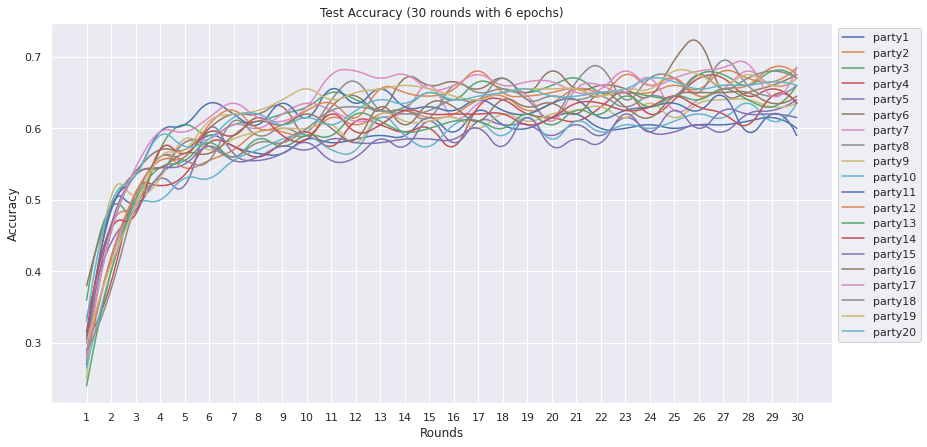

In [6]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

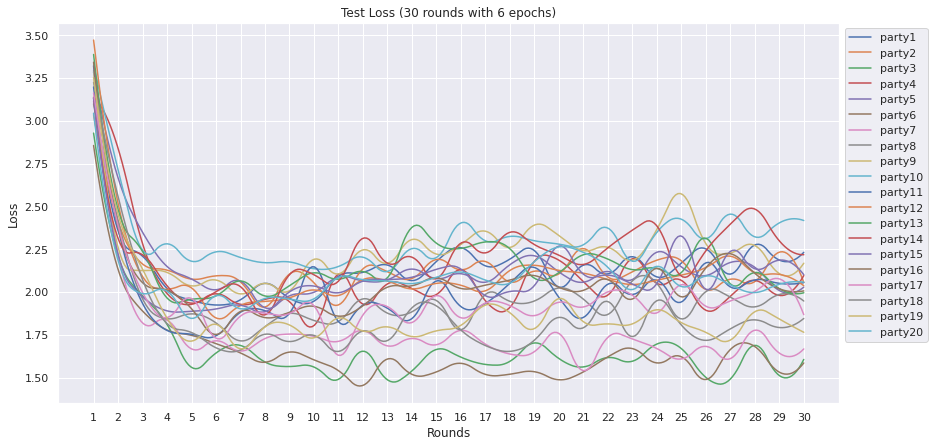

In [7]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

In [ ]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

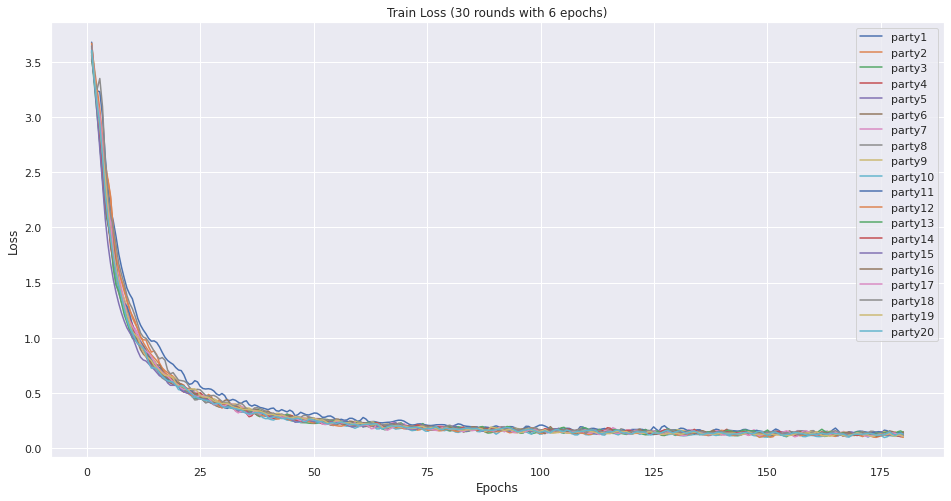

In [9]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [14]:
aggregator.model_synch()

2021-06-06T10:22:11.832Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-06T10:22:11.835Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7feb0a9304a8>
2021-06-06T10:22:11.836Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-06T10:22:13.807Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-06T10:22:13.808Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-06T10:22:13.808Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-06T10:22:13.809Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [15]:
aggregator.eval_model()

2021-06-06T10:22:25.697Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-06T10:22:25.698Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-06T10:22:27.163Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-06T10:22:27.163Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-06T10:22:27.164Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-06T10:22:27.164Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-06T10:22:27.165Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [14]:
aggregator.save_model()

2021-06-05T19:31:15.255Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-05T19:31:15.256Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T19:31:18.370Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-05T19:31:18.371Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T19:31:18.371Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T19:31:18.372Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-05T19:31:18.372Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
